In [35]:
import numpy as np
import matplotlib.pyplot as plt
import helper_functions as hf


## Load and sanitize dataframe

In [36]:
df = hf.sanitize_and_anonymize_data(rerun=True)

print(f"{len(df)} entries, of which {np.sum(~df.is_postdoc)} are PhDs and {np.sum(df.is_postdoc)} are postdocs")
df.head(5)
# Conflicting sports
# np.sum(df["volleyball"] & df["basketball"])
# np.sum(df["football"] & df["tennis"])
# df[df["capture_the_flag"] & df["spikeball"]]["nickname"].tolist()


Interested in the following sports, but not available:
Basketball 2
Running/Sprints 1
Volleyball 4
Chess 1
Football 2
Tennis 0
Capture the flag 3
Spikeball 2
Beer Pong 2
Fooseball 2
Ping Pong 0
90 entries, of which 70 are PhDs and 20 are postdocs


,nickname,institute,is_postdoc,avail_monday,avail_tuesday,avail_thursday,avail_friday,wants_basketball,basketball,wants_running_sprints,...,spikeball,wants_beer_pong,beer_pong,wants_fooseball,fooseball,wants_ping_pong,ping_pong,num_sports,num_sports_not_avail,late_entry
0,Pushy Bulldog,MPE,False,True,True,True,True,False,False,True,...,True,False,False,False,False,True,True,5,0,False
1,Thankful Kakapo,MPE,False,True,True,True,True,False,False,True,...,True,True,True,True,True,True,True,7,0,False
2,Exemplary Cassowary,MPA,False,True,True,True,True,False,False,False,...,True,True,True,False,False,False,False,4,0,False
3,Magnificent Barracuda,MPE,False,True,True,True,True,False,False,True,...,True,True,True,True,True,True,True,9,0,False
4,Dishonest Fangtooth,MPA,False,False,True,True,True,True,False,False,...,True,True,True,True,True,True,True,5,2,False


Text(0.5, 0, 'Number of sports players showed\ninterest in but are not available')

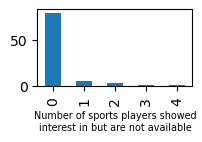

In [37]:
# df.plot.hist("num_sports_not_avail")
fig, ax = plt.subplots(figsize=(2, 1))
df["num_sports_not_avail"].value_counts().sort_index().plot.bar()
plt.xlabel("Number of sports players showed\ninterest in but are not available", size="x-small")


In [67]:
best_seed = 516 # hf.find_optimal_team_seed(df, 3, num_tries=2000)
print(best_seed)


516


,nickname,institute,is_postdoc,basketball,running_sprints,volleyball,chess,football,tennis,capture_the_flag,spikeball,beer_pong,fooseball,ping_pong,num_sports,late_entry


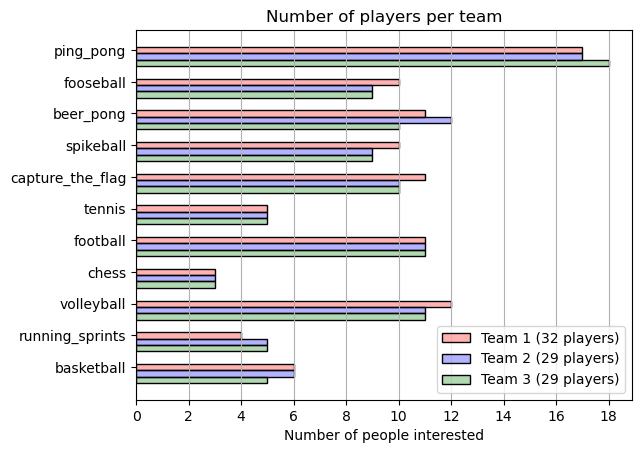

In [42]:
teams = hf.create_teams(df, 3, None, from_backup=False, create_backup=True)
fig, ax = plt.subplots()
for team in teams:
    team.plot_sports_num()
ax.set_title("Number of players per team")
ax.legend()

players = teams[0].player_df
cols = [col for col in players.columns if not "wants" in col and not "avail" in col]
players[players["running_sprints"] & ~players["chess"] & ~players["volleyball"] & ~players["basketball"]][cols]
# players[~players["tennis"] & players["chess"]][cols]


In [50]:
import pandas as pd
for team in teams:
    subteams_bb = team.get_subteams_for_sport(hf.SPORTS_EVENTS["basketball"])
    subteams_vb = team.get_subteams_for_sport(hf.SPORTS_EVENTS["volleyball"])
    print([key + str(team["nickname"].tolist()) for key, team in subteams_bb.items()])
for team in teams:
    sub_df = team.player_df[(team.player_df["subteam_volleyball"] + team.player_df["subteam_basketball"]) != ""]
    print(sub_df[["nickname", "subteam_volleyball", "subteam_basketball"]])


["A['Awesome Wolverine', 'Overjoyed Tapir', 'Clumsy Lizard', 'Ill-fated Meerkat', 'Failing Muskrat']"]
["A['Ignorant Lemur', 'Frail Skunk', 'Revolving Coelacanth', 'Gargantuan Okapi', 'Ideal Vaquita']"]
["A['Real Mouse', 'Blank Tiffany', 'Damaged Fly', 'Alarmed Bird', 'Scientific Angelfish']"]
                 nickname subteam_volleyball subteam_basketball
3   Magnificent Barracuda                  B                   
21           Animated Yak                  B                   
60        Failing Muskrat                  R                  A
26            Nutty Sheep                  B                   
63         Excited Rabbit                  R                  R
75      Ill-fated Meerkat                                     A
2     Exemplary Cassowary                  A                   
23            Limp Monkey                  B                   
78       Mammoth Barnacle                  A                   
8          Reflecting Pug                  A                   
9

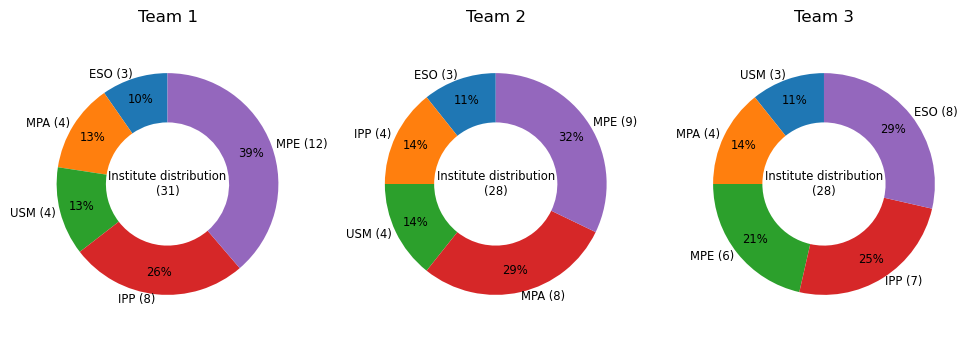

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, team in zip(axes, teams):
    plt.sca(ax)
    hf.create_institute_plot(team.player_df)
    ax.set_title(team.name)


In [21]:
teams[0].get_all_players_for_sport("chess")


,nickname,institute,is_postdoc,volleyball,running_sprints,basketball,chess,tennis,football,capture_the_flag,spikeball,beer_pong,ping_pong,fooseball,num_sports,avail_monday,avail_tuesday,avail_thursday,avail_friday,late_entry
55,Clever Wombat,IPP,False,True,False,False,True,False,False,False,False,False,True,False,3,True,True,False,True,False
61,Trifling Tarpon,IPP,False,True,False,False,True,False,True,False,False,False,True,False,4,True,True,True,True,False
75,Awkward Cichlid,USM,False,False,False,False,True,False,True,False,True,False,True,False,4,True,True,True,True,False


## Make some plots

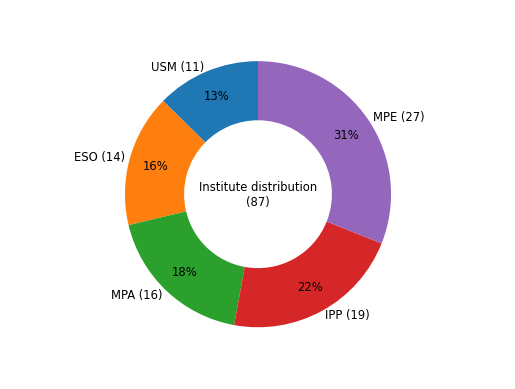

In [148]:
# Distribution of institutes
hf.create_institute_plot(df)


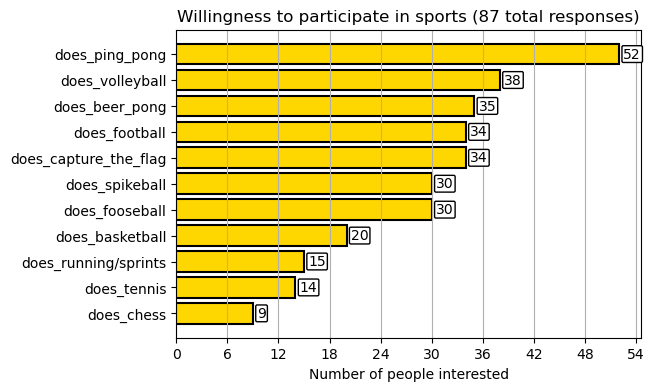

In [10]:
# Overall distribution of sports
fig, ax = plt.subplots(figsize=(6, 4))
hf.create_sports_num_plot(df, annotate_numbers=True, sort_bars=True)
